In [7]:
from KRKDataset import KRKDataset
import networkx as nx
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch_geometric.utils.convert import to_networkx

In [8]:
def plot_graph(graph):
    pos = {i:(i%8,i//8) for i in range(64)}
    colors = []
    for i in graph.x:
        if torch.any(i) == 1:
            colors.append('#0082A4')
        else:
            colors.append('#00386C')
    labels = {i:f'{(i%8,i//8)}' for i in range(64)}
    G = to_networkx(graph, to_undirected=True)
    nx.draw(G, node_color=colors, pos=pos, node_size=1000)
    plt.show()

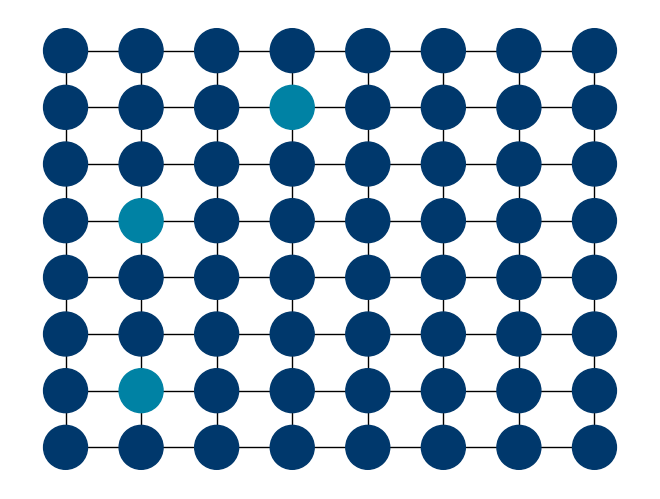

In [17]:
data = KRKDataset(root='FullBoard')

plot_graph(data[7])

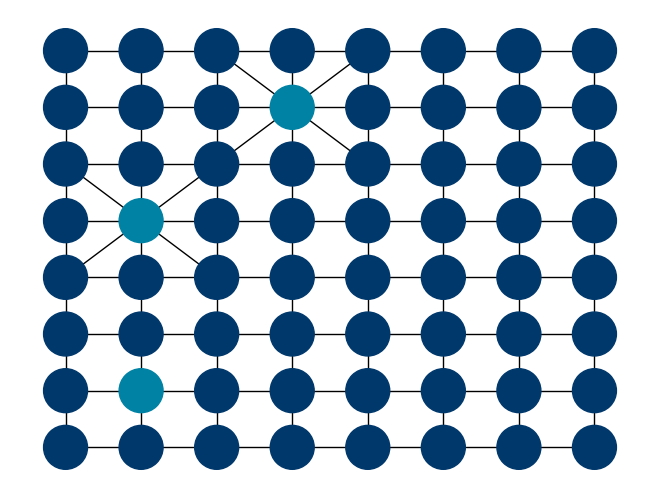

In [16]:
data = KRKDataset(root='FullDiag')
plot_graph(data[7])

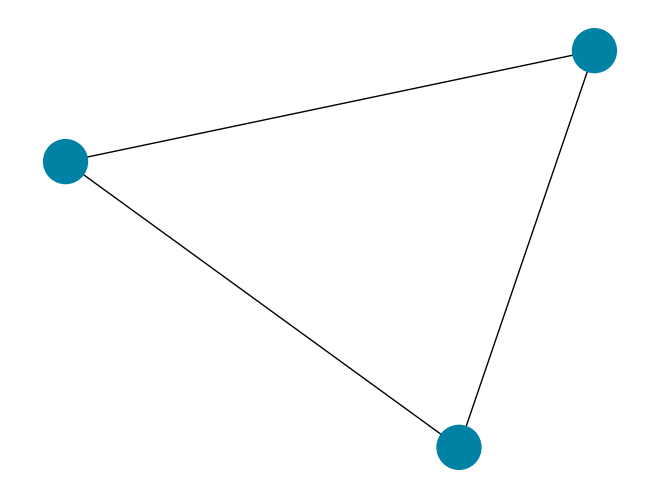

In [18]:
data = KRKDataset(root='Simple')

graph = data[0]
G = to_networkx(graph, to_undirected=True)
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=1000,node_color=['#0082A4' for i in range(3)])

In [12]:
data = KRKDataset(root='Simple')

dataset, test = train_test_split(data, test_size=0.2,random_state=43,shuffle=True)

print(dataset[0].x)
print(test[0].x)

tensor([[5, 3],
        [5, 2],
        [5, 0]], dtype=torch.int32)
tensor([[5, 2],
        [5, 7],
        [1, 3]], dtype=torch.int32)
